# Importing Required Libraries



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data load

In [7]:
path = "recommended.csv"
data = pd.read_csv(path)

# Overview of the data

In [8]:
data.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,30-Nov-19,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
1,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",29-Nov-19,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
2,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,29-Nov-19,2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
3,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,29-Nov-19,2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie
4,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,29-Nov-19,2016,TV-MA,107 min,"Dramas, International Movies",The life and times of iconic South African lib...,Movie


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3446 non-null   int64 
 1   title         3446 non-null   object
 2   director      3446 non-null   object
 3   cast          3446 non-null   object
 4   country       3446 non-null   object
 5   date_added    3446 non-null   object
 6   release_year  3446 non-null   int64 
 7   rating        3446 non-null   object
 8   duration      3446 non-null   object
 9   listed_in     3446 non-null   object
 10  description   3446 non-null   object
 11  type          3446 non-null   object
dtypes: int64(2), object(10)
memory usage: 323.2+ KB


In [10]:
data.describe()

,show_id,release_year
count,3.446000e+03,3446.000000
mean,7.599321e+07,2012.572258
std,1.181102e+07,9.115793
min,2.698800e+05,1942.000000
25%,7.030419e+07,2012.000000
50%,8.015443e+07,2016.000000
75%,8.023964e+07,2017.000000
max,8.122720e+07,2019.000000


In [11]:
data.dtypes

show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object

# handeling missing values and unnecessary collumns

there is no null values in data

In [12]:
data.isnull().sum()

show_id         0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
type            0
dtype: int64

I think date_added is irrelevant to the data so i will drop it

In [13]:
data = data.drop(columns=['date_added'])

In [14]:
#confirming it’s been deleted.
data.head()

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description,type
0,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
1,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
2,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
3,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie
4,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,2016,TV-MA,107 min,"Dramas, International Movies",The life and times of iconic South African lib...,Movie


# Data Visualization

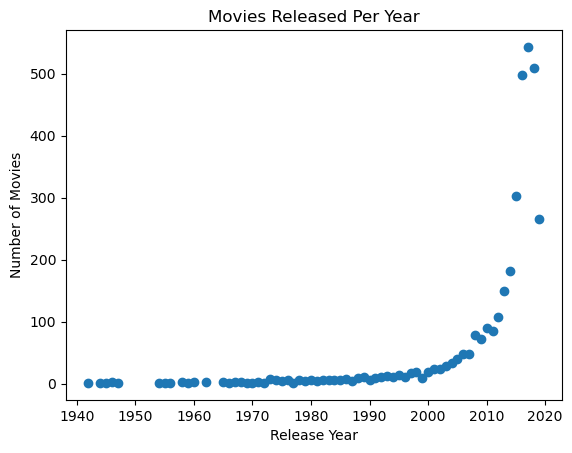

In [15]:
movies_per_year = data[data['type'] == 'Movie'].groupby('release_year').size()
plt.scatter(movies_per_year.index, movies_per_year.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Movies Released Per Year')
plt.show()

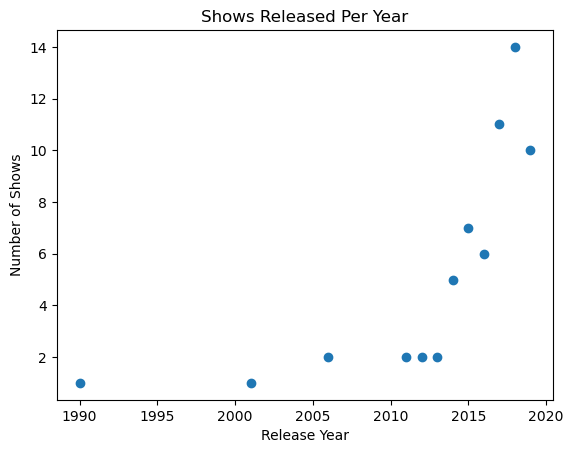

In [16]:
shows_per_year = data[data['type'] == 'TV Show'].groupby('release_year').size()
plt.scatter(shows_per_year.index, shows_per_year.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Shows Released Per Year')
plt.show()

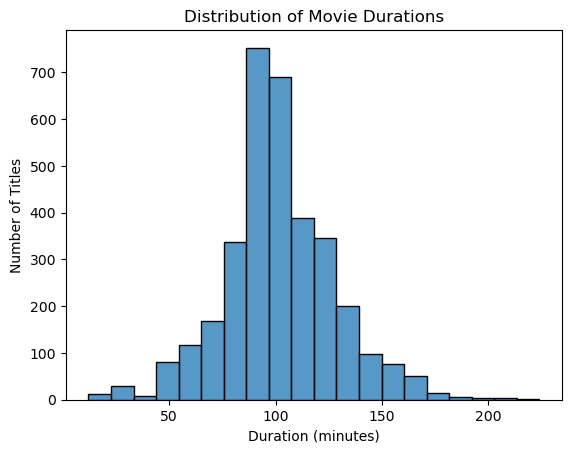

In [17]:
Movie_data = data[data['type'] == 'Movie'].copy()
Movie_data.loc[:, 'duration'] = Movie_data['duration'].str.replace(' min', '').astype(float)
sns.histplot(Movie_data['duration'], bins=20)
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Titles')
plt.title('Distribution of Movie Durations')
plt.show()

Text(0.5, 1.0, 'Released movies and shows by countries')

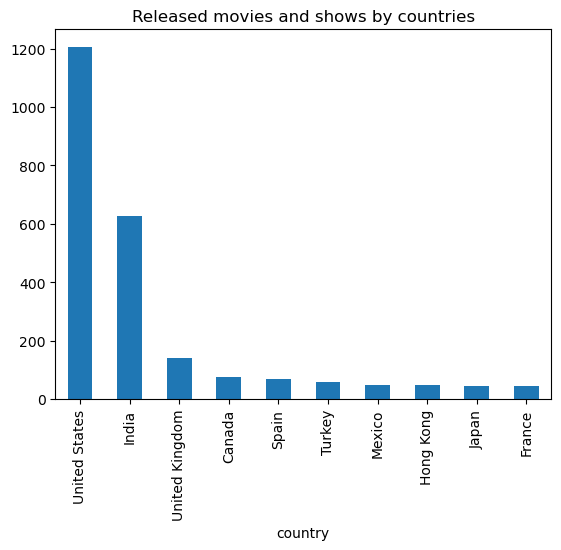

In [18]:
data['country'].value_counts().head(10).plot(kind='bar')
plt.title('Released movies and shows by countries')

Text(0.5, 1.0, 'Most popular genres')

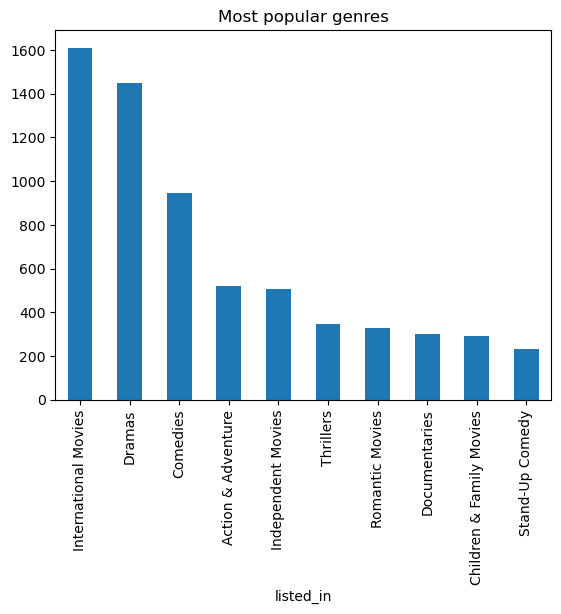

In [19]:
genres = data['listed_in'].str.split(', ').explode()
genres.value_counts().head(10).plot(kind='bar')
plt.title('Most popular genres')